# Economic Data Analysis with FRED & Pandas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

import fredapi as fa

fred_key = "Your API key"



# 1. Creating the FRED object

In [15]:
fred = fa.Fred(api_key=fred_key)

# 2. Search for ecnomic data

In [16]:
sp_search = fred.search('S&P', order_by='popularity')

In [17]:
sp_search.shape

(1000, 15)

In [59]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2024-04-13   2024-04-13   
CSUSHPINSA          CSUSHPINSA     2024-04-13   2024-04-13   
SP500                    SP500     2024-04-13   2024-04-13   
MEHOINUSA672N    MEHOINUSA672N     2024-04-13   2024-04-13   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2024-04-13   2024-04-13   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA      S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                     S&P 500   
MEHOINUSA672N   Real Median Household Income in the United States   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2024-04-11  Daily, Close   
CSUSHPINSA            1987-01-01      2024-01-01       Monthly   
SP500                 2014-04-14      2024-04-12  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY        1996-12-31      2024-04-11  Daily, Close   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY               D                         Percent   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2024-04-12 09:09:12-05:00   
CSUSHPINSA                           NSA  2024-03-26 08:11:02-05:00   
SP500                                NSA  2024-04-12 19:10:59-05:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   
BAMLH0A0HYM2EY                       NSA  2024-04-12 09:09:15-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           92  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             88  For more information regarding the index, plea...  
SP500                  83  The observations for the S&P 500 represent the...  
MEHOINUSA672N          83  Household data are collected as of March.  As ...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...

# 3. Pull Raw Data & Plot

In [19]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

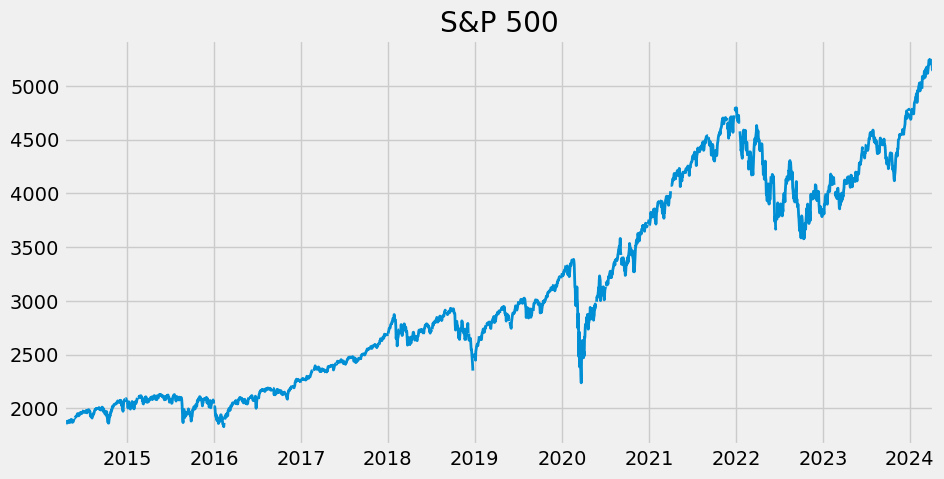

In [20]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [21]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent" ')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [22]:
unemp_df.head()

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-04-13   2024-04-13   
LNS14000006            LNS14000006     2024-04-13   2024-04-13   
CAUR                          CAUR     2024-04-13   2024-04-13   
TXUR                          TXUR     2024-04-13   2024-04-13   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-04-13   2024-04-13   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
CAUR                            Unemployment Rate in California   
TXUR                                 Unemployment Rate in Texas   
M0892AUSM156SNBR            Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-03-01   Monthly               M   
LNS14000006             1972-01-01      2024-03-01   Monthly               M   
CAUR                    1976-01-01      2024-02-01   Monthly               M   
TXUR                    1976-01-01      2024-02-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-04-05 07:50:02-05:00   
LNS14000006                             SA  2024-04-05 07:50:16-05:00   
CAUR                                    SA  2024-03-25 16:05:02-05:00   
TXUR                                    SA  2024-03-25 16:02:03-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   95  The unemployment rate represents the number of...  
LNS14000006              72  The series comes from the 'Current Population ...  
CAUR                     64                                               None  
TXUR                     56                                               None  
M0892AUSM156SNBR         54  Series Is Presented Here As Three Variables--(...

In [23]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1).drop(['M08311USM156SNBR'], axis =1)

In [24]:
unemp_results.head()

UNRATE  LNS14000006  CAUR  TXUR  M0892AUSM156SNBR  LNS14000024  \
1929-04-01     NaN          NaN   NaN   NaN              0.69          NaN   
1929-05-01     NaN          NaN   NaN   NaN              1.65          NaN   
1929-06-01     NaN          NaN   NaN   NaN              2.06          NaN   
1929-07-01     NaN          NaN   NaN   NaN              0.79          NaN   
1929-08-01     NaN          NaN   NaN   NaN              0.04          NaN   

            LNS14000031  M0892BUSM156SNBR  NYUR  U2RATE  FLUR  LNS14000002  \
1929-04-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-05-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-06-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-07-01          NaN               NaN   NaN     NaN   NaN          NaN   
1929-08-01          NaN               NaN   NaN     NaN   NaN          NaN   

            LNS14000009  LNS14000003  PAUR  OHUR  LNS14000001  LNS14027660  \
1929-04-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-05-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-06-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-07-01          NaN          NaN   NaN   NaN          NaN          NaN   
1929-08-01          NaN          NaN   NaN   NaN          NaN          NaN   

            MIUR  LNS14027662  ALUR  LNS14024887  MAUR  NCUR  ILUR  NJUR  \
1929-04-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN          NaN   NaN          NaN   NaN   NaN   NaN   NaN   

            GAUR  COUR  AZUR  WIUR  VAUR  KYUR  LRUN64TTUSM156S  SCUR  NMUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN              NaN   NaN   NaN   

            MNUR  TNUR  LNS14032183  LNS14000012  WAUR  LNS14027659  MDUR  \
1929-04-01   NaN   NaN          NaN          NaN   NaN          NaN   NaN   
1929-05-01   NaN   NaN          NaN          NaN   NaN          NaN   NaN   
1929-06-01   NaN   NaN          NaN          NaN   NaN          NaN   NaN   
1929-07-01   NaN   NaN          NaN          NaN   NaN          NaN   NaN   
1929-08-01   NaN   NaN          NaN          NaN   NaN          NaN   NaN   

            ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  PRUR  INUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            LAUR  HIUR  LASMT261982000000003  NDUR  MTUR  DCUR  MSUR  \
1929-04-01   NaN   NaN                   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN                   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN                   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN                   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN                   NaN   NaN   NaN   NaN   NaN   

            LNS14000060  LNS14000028  MEUR  NEUR  LASMT391746000000003  CTUR  \
1929-04-01          NaN          NaN   NaN   NaN                   NaN   NaN   
1929-05-01          NaN          NaN   NaN   NaN                   NaN   NaN   
1929-06-01          NaN          NaN   NaN   NaN        

In [25]:
drop_columns = [c for c in unemp_results.columns if len(c) > 4]
unemp_states = unemp_results.drop(columns=drop_columns)

In [26]:
unemp_states.head()

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  
1929-04-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-05-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-06-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-07-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1929-08-01   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [27]:
fg = px.line(unemp_states.isna().sum(axis=1), labels={'index' : 'Years', 'value' : 'NULL Count'}, title='Cutoff Date of Data Collection of States', markers=True)
fg.update_layout(showlegend = False)

In [28]:
# Updating the dataframe by dropping all the NULL rows i.e. rows before the cutoff date of Jan 1976
unemp_states = unemp_states.iloc[unemp_states.index.get_loc('1976-01-01'):]

In [29]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [30]:
unemp_states.head()

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   

            Oklahoma  Missouri  Alaska  Iowa  Utah  Puerto Rico  Indiana  \
1976-01-01       5.8       5.9     7.1   4.3   5.8         19.6      6.6   
1976-02-01       5.8       5.9     7.1   4.3   5.9         19.5      6.6   
1976-03-01       5.8       5.9     7.0   4.3   5.8         19.3      6.5   
1976-04-01       5.8       6.0     6.9   4.2   5.8         19.0      6.3   
1976-05-01       5.7       6.0     6.9   4.1   5.7         18.9      6.0   

            Louisiana  Hawaii  North Dakota  Montana  \
1976-01-01        6.3     9.8           3.4      5.8   
1976-02-01        6.3     9.8           3.4      5.8   
1976-03-01        6.3     9.8           3.4      5.8   
1976-04-01        6.4     9.7           3.5      5.8   
1976-05-01        6.5     9.4           3.6      5.8   

            the District of Columbia  Mississippi  Maine  Nebraska  \
1976-01-01                       8.7          6.7    8.7       3.3   
1976-02-01                       8.7          6.7    8.7       3.3   
1976-03-01                       8.6          6.6    8.6       3.3   
1976-04-01                       8.5          6.4    8.6       3.2   
1976-05-01                       8.4          6.3    8.5       3.1   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   

            Delaware  Vermont  South Dakota  
1976-01-01       8.0      8.6    

In [31]:
unemp_states.drop('Puerto Rico', axis=1, inplace=True)

In [32]:
px.line(unemp_states, title='Statewise Unemployment Rates through the years', labels={'value':'Unemployment Rate','index':'Year','variable':'States'})

# 5. Pull April 2020 Unemployment Rate Per State

In [33]:
ax= unemp_states.loc[unemp_states.index == '2020-04-01'].T.sort_values('2020-04-01')
ax.head()

2020-04-01
Wyoming              5.1
Nebraska             8.2
Connecticut          8.3
North Dakota         8.7
South Dakota         8.8

In [34]:
fig = px.bar(ax,title = 'Unmeployment Rate by State, April 2020',labels={'index' : 'States','value':'Unemployment Rates'})
fig.update_layout(showlegend = False)

# 6. Pull Participation Rate

In [35]:
part_df  = fred.search('participation rate states', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [36]:
part_df.head()

id realtime_start realtime_end  \
series id                                              
CIVPART          CIVPART     2024-04-13   2024-04-13   
LNS11300060  LNS11300060     2024-04-13   2024-04-13   
LNS11300002  LNS11300002     2024-04-13   2024-04-13   
LNS11300001  LNS11300001     2024-04-13   2024-04-13   
LNS11324230  LNS11324230     2024-04-13   2024-04-13   

                                                       title  \
series id                                                      
CIVPART                       Labor Force Participation Rate   
LNS11300060      Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002           Labor Force Participation Rate - Women   
LNS11300001             Labor Force Participation Rate - Men   
LNS11324230  Labor Force Participation Rate - 55 Yrs. & over   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
CIVPART            1948-01-01      2024-03-01   Monthly               M   
LNS11300060        1948-01-01      2024-03-01   Monthly               M   
LNS11300002        1948-01-01      2024-03-01   Monthly               M   
LNS11300001        1948-01-01      2024-03-01   Monthly               M   
LNS11324230        1948-01-01      2024-03-01   Monthly               M   

               units units_short  seasonal_adjustment  \
series id                                               
CIVPART      Percent           %  Seasonally Adjusted   
LNS11300060  Percent           %  Seasonally Adjusted   
LNS11300002  Percent           %  Seasonally Adjusted   
LNS11300001  Percent           %  Seasonally Adjusted   
LNS11324230  Percent           %  Seasonally Adjusted   

            seasonal_adjustment_short              last_updated popularity  \
series id                                                                    
CIVPART                            SA 2024-04-05 07:51:02-05:00         84   
LNS11300060                        SA 2024-04-05 07:50:19-05:00         70   
LNS11300002                        SA 2024-04-05 07:51:03-05:00         66   
LNS11300001                        SA 2024-04-05 07:51:05-05:00         61   
LNS11324230                        SA 2024-04-05 07:50:27-05:00         54   

                                                         notes  
series id                                                       
CIVPART      The series comes from the 'Current Population ...  
LNS11300060  The series comes from the 'Current Population ...  
LNS11300002  To obtain estimates of women worker employment...  
LNS11300001  The series comes from the 'Current Population ...  
LNS11324230  The series comes from the 'Current Population ...

In [37]:
part_df['title'] = part_df['title'].str.replace('Labor Force Participation Rate for ', '', regex=True)
part_id_to_states = dict(zip(part_df['id'], part_df['title']))

In [38]:

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)

In [39]:
part_states.head()

CIVPART  LNS11300060  LNS11300002  LNS11300001  LNS11324230  \
1948-01-01     58.6         64.2         32.0         86.7         43.0   
1948-02-01     58.9         64.6         32.4         87.0         43.3   
1948-03-01     58.5         64.3         32.1         86.3         43.0   
1948-04-01     59.0         64.8         33.0         86.6         43.4   
1948-05-01     58.3         64.3         32.0         86.1         43.2   

            LNS11300012  LNS11300006  LRAC25MAUSM156S  LNS11300036  \
1948-01-01         53.2          NaN              NaN         64.4   
1948-02-01         53.7          NaN              NaN         64.9   
1948-03-01         54.1          NaN              NaN         63.3   
1948-04-01         54.2          NaN              NaN         63.7   
1948-05-01         50.9          NaN              NaN         63.7   

            LNS11327662  LRAC25FEUSM156S  LBSSA06  LNS11300028  LNS11300031  \
1948-01-01          NaN              NaN      NaN          NaN          NaN   
1948-02-01          NaN              NaN      NaN          NaN          NaN   
1948-03-01          NaN              NaN      NaN          NaN          NaN   
1948-04-01          NaN              NaN      NaN          NaN          NaN   
1948-05-01          NaN              NaN      NaN          NaN          NaN   

            LBSSA01  LNS11300003  LNS11327660  LBSSA36  LNS11300029  LBSSA26  \
1948-01-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-02-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-03-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-04-01      NaN          NaN          NaN      NaN          NaN      NaN   
1948-05-01      NaN          NaN          NaN      NaN          NaN      NaN   

            LBSSA28  LNS11300009  LNS11300032  LBSSA48  LBSSA12  LBSSA21  \
1948-01-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-02-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-03-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-04-01      NaN          NaN          NaN      NaN      NaN      NaN   
1948-05-01      NaN          NaN          NaN      NaN      NaN      NaN   

            LBSSA39  LBSSA55  LBSSA42  LBSSA25  LBSSA27  LBSSA24  LBSSA54  \
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            LBSSA47  LNS11327659  LBSSA23  LBSSA17  LBSSA37  LBSSA13  LBSSA22  \
1948-01-01      NaN          NaN      NaN      NaN      NaN      NaN      NaN   
1948-02-01      NaN          NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01      NaN          NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01      NaN          NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01      NaN          NaN      NaN      NaN      NaN      NaN      NaN   

            LBSSA45  LBSSA08  LBSSA49  LBSSA51  LBSSA18  LNS11300026  LBSSA29  \
1948-01-01      NaN      NaN      NaN      NaN      NaN         31.0      NaN   
1948-02-01      NaN      NaN      NaN      NaN      NaN         31.4      NaN   
1948-03-01      NaN      NaN      NaN      NaN      NaN         31.1      NaN   
1948-04-01      NaN      NaN      NaN      NaN      NaN         32.1      NaN   
1948-05-01      NaN      NaN      NaN      NaN      NaN         31.3      NaN   

            LRIN64TTUSM156S  LBSSA34  LRAC64TTUSM156S  LBSSA19  LBSSA02  \
1948-01-01              NaN      NaN              NaN      NaN      NaN   
1948-02-01              NaN      NaN              NaN      NaN      NaN   
1948-03-01              NaN      NaN              NaN      NaN   

In [40]:
part_states.columns = [part_id_to_states[c] for c in part_states.columns]

In [41]:
part_states.head()

Labor Force Participation Rate  \
1948-01-01                            58.6   
1948-02-01                            58.9   
1948-03-01                            58.5   
1948-04-01                            59.0   
1948-05-01                            58.3   

            Labor Force Participation Rate - 25-54 Yrs.  \
1948-01-01                                         64.2   
1948-02-01                                         64.6   
1948-03-01                                         64.3   
1948-04-01                                         64.8   
1948-05-01                                         64.3   

            Labor Force Participation Rate - Women  \
1948-01-01                                    32.0   
1948-02-01                                    32.4   
1948-03-01                                    32.1   
1948-04-01                                    33.0   
1948-05-01                                    32.0   

            Labor Force Participation Rate - Men  \
1948-01-01                                  86.7   
1948-02-01                                  87.0   
1948-03-01                                  86.3   
1948-04-01                                  86.6   
1948-05-01                                  86.1   

            Labor Force Participation Rate - 55 Yrs. & over  \
1948-01-01                                             43.0   
1948-02-01                                             43.3   
1948-03-01                                             43.0   
1948-04-01                                             43.4   
1948-05-01                                             43.2   

            Labor Force Participation Rate - 16-19 Yrs.  \
1948-01-01                                         53.2   
1948-02-01                                         53.7   
1948-03-01                                         54.1   
1948-04-01                                         54.2   
1948-05-01                                         50.9   

            Labor Force Participation Rate - Black or African American  \
1948-01-01                                                NaN            
1948-02-01                                                NaN            
1948-03-01                                                NaN            
1948-04-01                                                NaN            
1948-05-01                                                NaN            

            Activity Rate: Aged 25-54: Males for United States  \
1948-01-01                                                NaN    
1948-02-01                                                NaN    
1948-03-01                                                NaN    
1948-04-01                                                NaN    
1948-05-01                                                NaN    

            Labor Force Participation Rate - 20-24 Yrs.  \
1948-01-01                                         64.4   
1948-02-01                                         64.9   
1948-03-01                                         63.3   
1948-04-01                                         63.7   
1948-05-01                                         63.7   

            Labor Force Participation Rate - Bachelor's Degree and Higher, 25 Yrs. & over  \
1948-01-01                                                NaN                               
1948-02-01                                                NaN                               
1948-03-01                                                NaN                               
1948-04-01                                                NaN                               
1948-05-01                                                NaN                               

            Activity Rate: Aged 25-54: Females for United States  California  \
1948-01-01                                                NaN            NaN   
1948-02-01                                                NaN            NaN   
1948-03-01  

In [42]:
part_state_data_filtered = part_states.filter(regex='^(?!.*(?:Activity|Inactivity|Labor)).*$', axis=1)

In [43]:
part_state_data_filtered.head()

California  Alabama  New York  Michigan  Mississippi  Texas  \
1948-01-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-02-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-03-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-04-01         NaN      NaN       NaN       NaN          NaN    NaN   
1948-05-01         NaN      NaN       NaN       NaN          NaN    NaN   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1948-01-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-02-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-03-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-04-01      NaN       NaN   NaN        NaN           NaN            NaN   
1948-05-01      NaN       NaN   NaN        NaN           NaN            NaN   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1948-01-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-02-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-03-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-04-01        NaN       NaN            NaN        NaN    NaN       NaN   
1948-05-01        NaN       NaN            NaN        NaN    NaN       NaN   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1948-01-01             NaN      NaN        NaN             NaN       NaN   
1948-02-01             NaN      NaN        NaN             NaN       NaN   
1948-03-01             NaN      NaN        NaN             NaN       NaN   
1948-04-01             NaN      NaN        NaN             NaN       NaN   
1948-05-01             NaN      NaN        NaN             NaN       NaN   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1948-01-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-02-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-03-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-04-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   
1948-05-01   NaN       NaN      NaN       NaN         NaN   NaN     NaN   

            Washington  Arizona  New Mexico  Idaho  Arkansas  Oklahoma  \
1948-01-01         NaN      NaN         NaN    NaN       NaN       NaN   
1948-02-01         NaN      NaN         NaN    NaN       NaN       NaN   
1948-03-01         NaN      NaN         NaN    NaN       NaN       NaN   
1948-04-01         NaN      NaN         NaN    NaN       NaN       NaN   
1948-05-01         NaN      NaN         NaN    NaN       NaN       NaN   

            Nebraska  Hawaii  Nevada  Montana  Oregon  New Hampshire  Vermont  \
1948-01-01       NaN     NaN     NaN      NaN     NaN            NaN      NaN   
1948-02-01       NaN     NaN     NaN      NaN     NaN            NaN      NaN   
1948-03-01       NaN     NaN     NaN      NaN     NaN            NaN      NaN   
1948-04-01       NaN     NaN     NaN      NaN     NaN            NaN      NaN   
1948-05-01       NaN     NaN     NaN      NaN     NaN            NaN      NaN   

            Connecticut  North Dakota  South Dakota  Kansas  Rhode Island  \
1948-01-01          NaN           NaN           NaN     NaN           NaN   
1948-02-01          NaN           NaN           NaN     NaN           NaN   
1948-03-01          NaN           NaN           NaN     NaN           NaN   
1948-04-01          NaN           NaN           NaN     NaN           NaN   
1948-05-01          NaN           NaN           NaN     NaN           NaN   

            District Of Columbia  Delaware  Wyoming  
1948-01-01                   NaN       NaN      NaN  
1948-02-01                   NaN       NaN      NaN  
1948-03-01                   NaN       NaN      NaN  
1948-04-01                   NaN       NaN      NaN  
1948-05-01                   NaN       NaN  

In [44]:
fg = px.line(part_state_data_filtered.isna().sum(axis=1), labels={'index' : 'Years', 'value' : 'NULL Count'}, title='Cutoff Date of Data Collection of States', markers=True)
fg.update_layout(showlegend = False)

In [45]:
part_state_data_filtered = part_state_data_filtered.iloc[part_state_data_filtered.index.get_loc('1976-01-01'):]

In [58]:
part_state_data_filtered.head()

California  Alabama  New York  Michigan  Mississippi  Texas  \
1976-01-01        62.6     57.0      58.0      61.6         58.8   63.8   
1976-02-01        62.4     56.9      58.0      61.5         58.6   63.5   
1976-03-01        62.2     56.8      58.0      61.5         58.5   63.4   
1976-04-01        62.2     56.8      58.0      61.6         58.5   63.5   
1976-05-01        62.3     56.8      58.1      61.7         58.5   63.6   

            Florida  Kentucky  Ohio  Wisconsin  Pennsylvania  Massachusetts  \
1976-01-01     55.8      60.5  61.7       65.6          58.4           64.8   
1976-02-01     55.7      60.3  61.7       65.5          58.3           64.7   
1976-03-01     55.5      60.2  61.7       65.4          58.3           64.6   
1976-04-01     55.5      60.1  61.6       65.4          58.3           64.6   
1976-05-01     55.4      60.1  61.6       65.5          58.3           64.6   

            Minnesota  Maryland  West Virginia  Tennessee  Maine  Illinois  \
1976-01-01       65.6      64.3           52.5       59.6   62.1      63.0   
1976-02-01       65.5      64.2           52.4       59.4   61.9      63.0   
1976-03-01       65.4      64.1           52.3       59.3   61.9      62.9   
1976-04-01       65.4      64.1           52.3       59.3   61.8      62.9   
1976-05-01       65.5      64.1           52.2       59.4   61.7      63.0   

            North Carolina  Georgia  Louisiana  South Carolina  Colorado  \
1976-01-01            66.5     63.7       56.8            65.3      67.2   
1976-02-01            66.3     63.6       56.6            65.2      67.0   
1976-03-01            66.2     63.5       56.5            65.0      66.8   
1976-04-01            66.2     63.5       56.4            64.9      66.6   
1976-05-01            66.3     63.6       56.4            64.7      66.5   

            Utah  Virginia  Indiana  Missouri  New Jersey  Iowa  Alaska  \
1976-01-01  62.8      65.9     64.0      60.5        61.5  64.4    69.0   
1976-02-01  62.6      65.8     63.9      60.3        61.4  64.3    68.4   
1976-03-01  62.5      65.6     63.8      60.3        61.4  64.2    67.8   
1976-04-01  62.5      65.5     63.8      60.4        61.5  64.1    67.9   
1976-05-01  62.6      65.4     63.9      60.6        61.6  64.1    67.9   

            Washington  Arizona  New Mexico  Idaho  Arkansas  Oklahoma  \
1976-01-01        60.9     59.5        60.8   63.0      57.9      59.3   
1976-02-01        60.7     59.2        60.5   62.8      57.8      59.2   
1976-03-01        60.6     59.1        60.3   62.7      57.7      59.1   
1976-04-01        60.6     59.1        60.3   62.7      57.7      59.0   
1976-05-01        60.7     59.1        60.3   62.8      57.7      59.0   

            Nebraska  Hawaii  Nevada  Montana  Oregon  New Hampshire  Vermont  \
1976-01-01      64.9    69.9    71.3     62.7    62.9           65.9     63.6   
1976-02-01      64.9    69.6    70.8     62.5    62.7           65.6     63.4   
1976-03-01      64.8    69.6    70.5     62.4    62.5           65.6     63.2   
1976-04-01      64.8    69.4    70.4     62.3    62.4           65.7     63.5   
1976-05-01      64.8    69.3    70.5     62.2    62.5           66.0     63.6   

            Connecticut  North Dakota  South Dakota  Kansas  Rhode Island  \
1976-01-01         64.2          62.6          64.6    65.1          63.8   
1976-02-01         64.1          62.4          64.4    65.0          63.7   
1976-03-01         64.0          62.3          64.4    64.9          63.6   
1976-04-01         64.1          62.5          64.3    65.0          63.7   
1976-05-01         64.3          62.6          64.3    65.1          63.6   

            the District of Columbia  Delaware  Wyoming  
1976-01-01                      64.4      62.7     65.3  
1976-02-01                      64.5      62.5     64.9  
1976-03-01                      64.5      62.5     64.7  
1976-04-01                      64.5      62.4     64.9  
1976-05-01              

In [47]:
px.line(part_state_data_filtered, title='Statewise Participation Rates through the years', labels={'value':'Participation Rate','index':'Year','variable':'States'})

# 7. Plot Unemployment vs Participation

In [48]:
# Convert index to datetime
unemp_states.index = pd.to_datetime(unemp_states.index)
part_state_data_filtered.index = pd.to_datetime(part_state_data_filtered.index)

C:\Users\singh\AppData\Local\Temp\ipykernel_5292\807741030.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



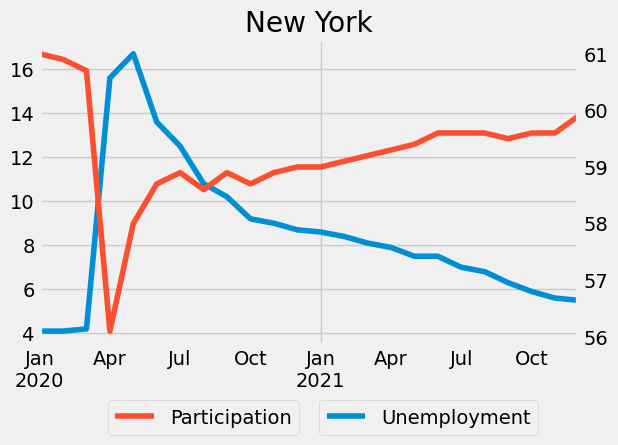

In [85]:
fig, axs = plt.subplots()
ax2 = axs.twinx()

unemp_states.query('index >= 2020 and index < 2022')['New York'] \
    .plot(ax=axs, label='Unemployment')
part_state_data_filtered.query('index >= 2020 and index < 2022')['New York'] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])

ax2.grid(False)
axs.set_title('New York')
axs.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15))

fig.tight_layout()
fig.show()

C:\Users\singh\AppData\Local\Temp\ipykernel_5292\3410634866.py:22: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



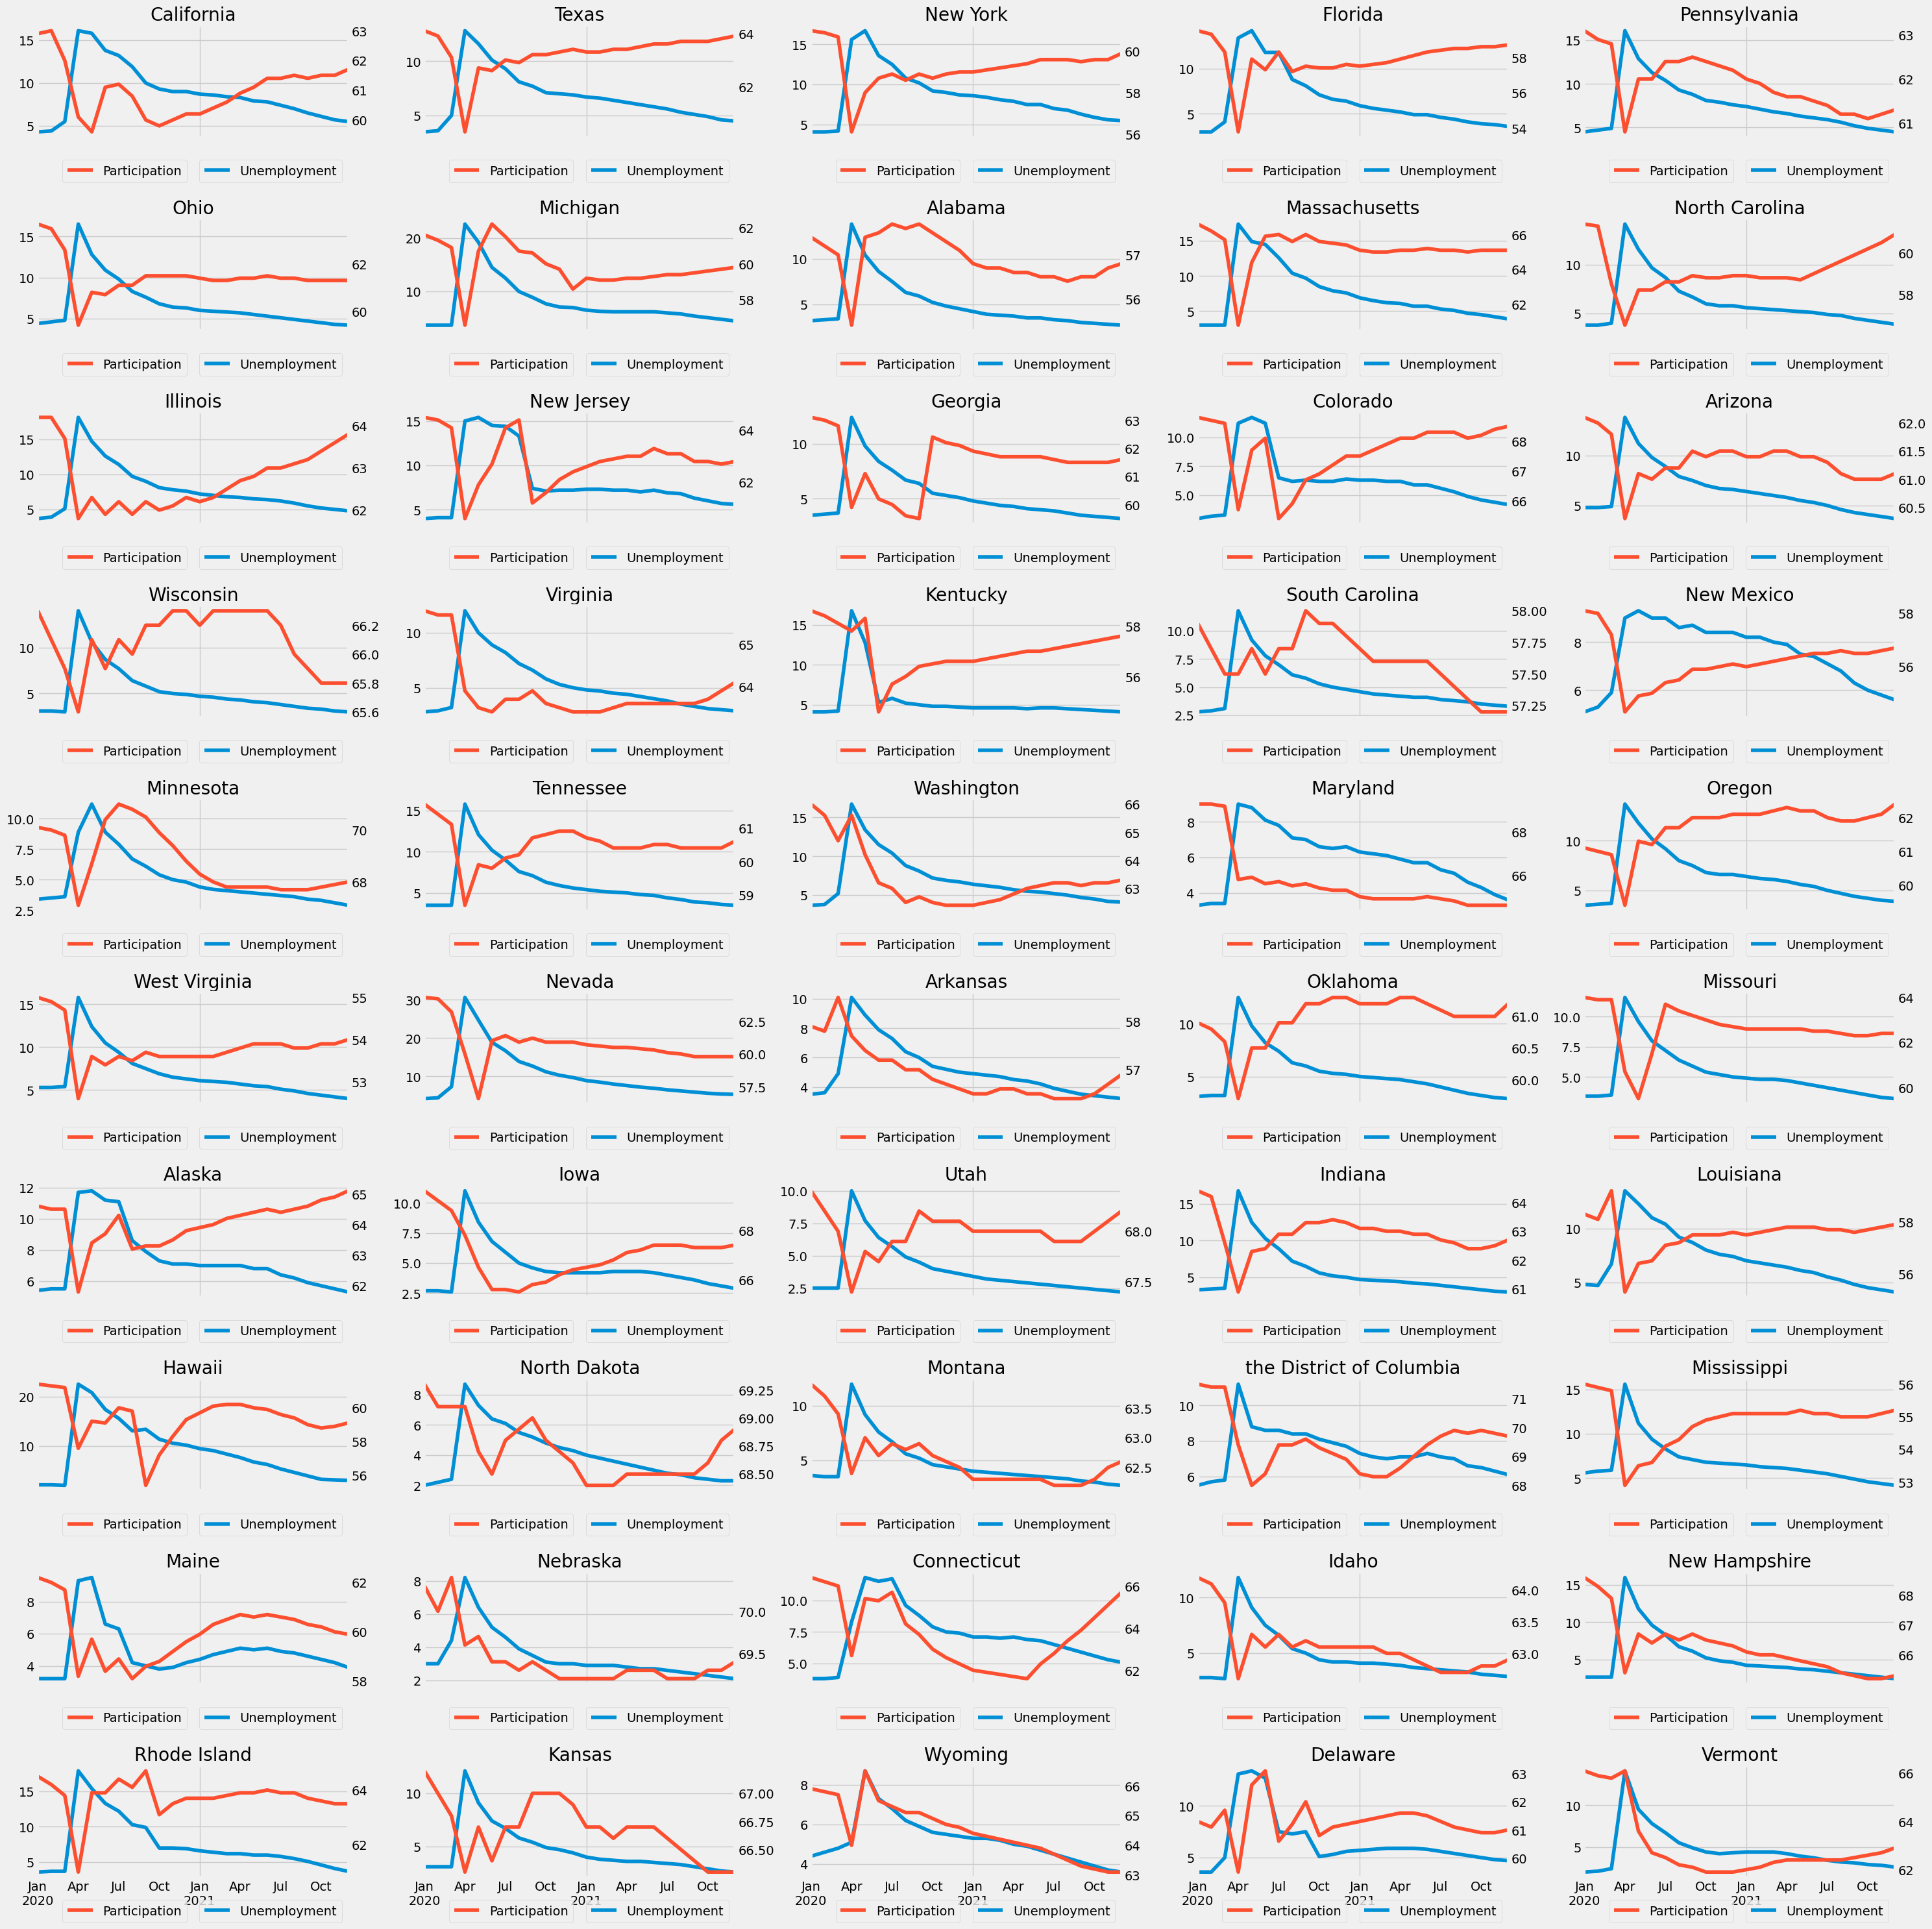

In [87]:
part_state_data_filtered.rename(columns = {'District Of Columbia': 'the District of Columbia'}, inplace=True)
fig, axs = plt.subplots(10,5, figsize=(30,30), sharex = True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if i >= len(axs):
        break
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_state_data_filtered.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])

    ax2.grid(False)
    axs[i].set_title(state)
    axs[i].legend(loc='upper left', bbox_to_anchor=(0.5, -0.15))
    ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15))
    i += 1

fig.tight_layout()
fig.show()

# End Of The Project